<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Lecture 2 -  2.6 - A gentle introduction to Numpy and Pandas


# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [1]:
import numpy as np

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [2]:
# Creating arrays
a = np.zeros((3))
b = np.ones((2,3))
c = np.random.randint(1,10,(2,3,4))
d = np.arange(0,11,1)

What are these functions?

    arange?

In [3]:
# Note the way each array is printed:
a,b,c,d

(array([ 0.,  0.,  0.]), array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]), array([[[7, 1, 9, 6],
         [6, 6, 2, 6],
         [4, 9, 9, 2]],
 
        [[7, 1, 8, 4],
         [7, 2, 8, 4],
         [9, 3, 7, 9]]]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [4]:
## Arithmetic in arrays is element wise

In [5]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
b

array([0, 1, 2, 3])

In [6]:
c = a-b
c

array([20, 29, 38, 47])

In [7]:
b**2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [8]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [9]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [10]:
a[2:5]

array([ 4,  9, 16])

In [11]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [12]:
b = np.random.randint(1,100,(4,4))

In [13]:
b

array([[ 1, 54, 84, 51],
       [14, 66, 71, 13],
       [15, 58, 65, 94],
       [68, 66, 94, 97]])

In [14]:
# Guess the output
print(b[2,3])
print(b[0,0])


94
1


In [15]:
b[0:3,1],b[:,1]

(array([54, 66, 58]), array([54, 66, 58, 66]))

In [16]:
b[1:3,:]

array([[14, 66, 71, 13],
       [15, 58, 65, 94]])

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
dates = pd.date_range('20140101',periods=6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
z = pd.DataFrame(index = df.index, columns = df.columns)
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [20]:
# Index, columns, underlying numpy data
df.T
df

,A,B,C,D
2014-01-01,-0.170595,-0.022520,-0.360482,0.185262
2014-01-02,1.158526,-0.676235,-1.805103,0.241791
2014-01-03,0.322347,-0.942499,-0.400321,1.236144
2014-01-04,-0.880827,-0.972276,0.714401,0.107875
2014-01-05,0.066959,-2.546325,-0.774084,-0.975123
2014-01-06,0.802250,-0.986007,-1.029235,0.524227


In [21]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [22]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

#### Viewing Data

In [23]:
df.head()

,A,B,C,D
2014-01-01,-0.170595,-0.022520,-0.360482,0.185262
2014-01-02,1.158526,-0.676235,-1.805103,0.241791
2014-01-03,0.322347,-0.942499,-0.400321,1.236144
2014-01-04,-0.880827,-0.972276,0.714401,0.107875
2014-01-05,0.066959,-2.546325,-0.774084,-0.975123


In [24]:
df.tail()

,A,B,C,D
2014-01-02,1.158526,-0.676235,-1.805103,0.241791
2014-01-03,0.322347,-0.942499,-0.400321,1.236144
2014-01-04,-0.880827,-0.972276,0.714401,0.107875
2014-01-05,0.066959,-2.546325,-0.774084,-0.975123
2014-01-06,0.802250,-0.986007,-1.029235,0.524227


In [25]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [26]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.216443,-1.024311,-0.609137,0.220029
std,0.723609,0.830920,0.835609,0.716614
min,-0.880827,-2.546325,-1.805103,-0.975123
25%,-0.111206,-0.982574,-0.965447,0.127222
50%,0.194653,-0.957388,-0.587203,0.213527
75%,0.682275,-0.742801,-0.370442,0.453618
max,1.158526,-0.022520,0.714401,1.236144


In [27]:
print df.sort_values(by='B')
df

                   A         B         C         D
2014-01-05  0.066959 -2.546325 -0.774084 -0.975123
2014-01-06  0.802250 -0.986007 -1.029235  0.524227
2014-01-04 -0.880827 -0.972276  0.714401  0.107875
2014-01-03  0.322347 -0.942499 -0.400321  1.236144
2014-01-02  1.158526 -0.676235 -1.805103  0.241791
2014-01-01 -0.170595 -0.022520 -0.360482  0.185262


,A,B,C,D
2014-01-01,-0.170595,-0.022520,-0.360482,0.185262
2014-01-02,1.158526,-0.676235,-1.805103,0.241791
2014-01-03,0.322347,-0.942499,-0.400321,1.236144
2014-01-04,-0.880827,-0.972276,0.714401,0.107875
2014-01-05,0.066959,-2.546325,-0.774084,-0.975123
2014-01-06,0.802250,-0.986007,-1.029235,0.524227


### Selection

In [28]:
df[['A','B']]

,A,B
2014-01-01,-0.170595,-0.022520
2014-01-02,1.158526,-0.676235
2014-01-03,0.322347,-0.942499
2014-01-04,-0.880827,-0.972276
2014-01-05,0.066959,-2.546325
2014-01-06,0.802250,-0.986007


In [29]:
df[0:3]

,A,B,C,D
2014-01-01,-0.170595,-0.022520,-0.360482,0.185262
2014-01-02,1.158526,-0.676235,-1.805103,0.241791
2014-01-03,0.322347,-0.942499,-0.400321,1.236144


In [30]:
# By label
df.loc[dates[0]]

A   -0.170595
B   -0.022520
C   -0.360482
D    0.185262
Name: 2014-01-01 00:00:00, dtype: float64

In [31]:
# multi-axis by label
df.loc[:,['A','B']]

,A,B
2014-01-01,-0.170595,-0.022520
2014-01-02,1.158526,-0.676235
2014-01-03,0.322347,-0.942499
2014-01-04,-0.880827,-0.972276
2014-01-05,0.066959,-2.546325
2014-01-06,0.802250,-0.986007


In [32]:
# Date Range
df.loc['20140102':'20140104',['B']]

,B
2014-01-02,-0.676235
2014-01-03,-0.942499
2014-01-04,-0.972276


In [33]:
# Fast access to scalar
df.at[dates[1],'B']

-0.67623531529289971

In [34]:
# iloc provides integer locations similar to np style
df.iloc[3:]

,A,B,C,D
2014-01-04,-0.880827,-0.972276,0.714401,0.107875
2014-01-05,0.066959,-2.546325,-0.774084,-0.975123
2014-01-06,0.802250,-0.986007,-1.029235,0.524227


### Boolean Indexing

In [35]:
df[df.A < 0] # Basically a 'where' operation

,A,B,C,D
2014-01-01,-0.170595,-0.022520,-0.360482,0.185262
2014-01-04,-0.880827,-0.972276,0.714401,0.107875


### Setting

In [36]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1*df_posA

In [37]:
df_posA

,A,B,C,D
2014-01-01,0.170595,0.022520,0.360482,-0.185262
2014-01-02,1.158526,-0.676235,-1.805103,0.241791
2014-01-03,0.322347,-0.942499,-0.400321,1.236144
2014-01-04,0.880827,0.972276,-0.714401,-0.107875
2014-01-05,0.066959,-2.546325,-0.774084,-0.975123
2014-01-06,0.802250,-0.986007,-1.029235,0.524227


In [38]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [39]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [40]:
df['F'] = s1

In [41]:
df

,A,B,C,D,F
2014-01-01,-0.170595,-0.022520,-0.360482,0.185262,NaN
2014-01-02,1.158526,-0.676235,-1.805103,0.241791,1.0
2014-01-03,0.322347,-0.942499,-0.400321,1.236144,2.0
2014-01-04,-0.880827,-0.972276,0.714401,0.107875,3.0
2014-01-05,0.066959,-2.546325,-0.774084,-0.975123,4.0
2014-01-06,0.802250,-0.986007,-1.029235,0.524227,5.0


### Missing Data

In [42]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [43]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [44]:
df1

,A,B,C,D,F,E
2014-01-01,-0.170595,-0.022520,-0.360482,0.185262,NaN,1.0
2014-01-02,1.158526,-0.676235,-1.805103,0.241791,1.0,1.0
2014-01-03,0.322347,-0.942499,-0.400321,1.236144,2.0,NaN
2014-01-04,-0.880827,-0.972276,0.714401,0.107875,3.0,NaN


In [45]:
# find where values are null
pd.isnull(df1)

,A,B,C,D,F,E
2014-01-01,False,False,False,False,True,False
2014-01-02,False,False,False,False,False,False
2014-01-03,False,False,False,False,False,True
2014-01-04,False,False,False,False,False,True


### Operations

In [46]:
df.describe()

,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.000000,5.000000
mean,0.216443,-1.024311,-0.609137,0.220029,3.000000
std,0.723609,0.830920,0.835609,0.716614,1.581139
min,-0.880827,-2.546325,-1.805103,-0.975123,1.000000
25%,-0.111206,-0.982574,-0.965447,0.127222,2.000000
50%,0.194653,-0.957388,-0.587203,0.213527,3.000000
75%,0.682275,-0.742801,-0.370442,0.453618,4.000000
max,1.158526,-0.022520,0.714401,1.236144,5.000000


In [47]:
df.mean(),df.mean(1) # Operation on two different axes

(A    0.216443
 B   -1.024311
 C   -0.609137
 D    0.220029
 F    3.000000
 dtype: float64, 2014-01-01   -0.092084
 2014-01-02   -0.016204
 2014-01-03    0.443134
 2014-01-04    0.393835
 2014-01-05   -0.045715
 2014-01-06    0.862247
 Freq: D, dtype: float64)

### Applying functions

In [48]:
df

,A,B,C,D,F
2014-01-01,-0.170595,-0.022520,-0.360482,0.185262,NaN
2014-01-02,1.158526,-0.676235,-1.805103,0.241791,1.0
2014-01-03,0.322347,-0.942499,-0.400321,1.236144,2.0
2014-01-04,-0.880827,-0.972276,0.714401,0.107875,3.0
2014-01-05,0.066959,-2.546325,-0.774084,-0.975123,4.0
2014-01-06,0.802250,-0.986007,-1.029235,0.524227,5.0


In [49]:
df.apply(np.cumsum)

,A,B,C,D,F
2014-01-01,-0.170595,-0.022520,-0.360482,0.185262,NaN
2014-01-02,0.987931,-0.698755,-2.165585,0.427053,1.0
2014-01-03,1.310278,-1.641255,-2.565906,1.663197,3.0
2014-01-04,0.429451,-2.613531,-1.851504,1.771072,6.0
2014-01-05,0.496411,-5.159856,-2.625588,0.795949,10.0
2014-01-06,1.298661,-6.145863,-3.654823,1.320176,15.0


In [50]:
df.apply(lambda x: x.max() - x.min())

A    2.039353
B    2.523805
C    2.519505
D    2.211268
F    4.000000
dtype: float64

In [51]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [52]:
np.random.randn(10,4)

array([[-1.4318364 ,  0.21314151,  0.16323219,  0.98593343],
       [-0.59494101,  1.70642089, -1.23039338,  1.74693916],
       [ 0.92669128,  1.82058703, -1.08531652, -0.22965173],
       [ 2.2310117 ,  1.03230106, -1.77673534, -1.02897522],
       [ 0.26123427,  0.24558037, -0.1568055 , -1.69009964],
       [-0.56444207, -0.53948455, -0.93902118,  0.20338383],
       [-1.89069475, -0.37010891,  0.07927093, -0.79178802],
       [ 0.25152893,  0.09112357, -1.74659158,  0.20633407],
       [ 0.18644315,  0.93109951, -0.3344049 ,  1.00954911],
       [-0.4706682 ,  0.52614967,  0.16114022, -0.99021053]])

In [53]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.346382,0.125196,0.902394,-1.029096
1,-1.033807,-0.230455,0.156394,1.389327
2,1.169988,-0.930314,-1.494730,-0.804327
3,0.349795,0.396118,1.479591,-1.119567
4,-0.789276,1.748806,0.829718,0.009254
5,0.206786,1.037162,0.327573,1.529545
6,0.623102,-0.726045,0.027391,2.734305
7,-0.639644,-0.582607,1.755652,-0.660662
8,0.475724,1.432398,-0.993298,0.776452
9,1.903067,-1.180940,0.279520,-1.260859


In [54]:
# Break it into pieces
pieces = [df[:3], df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -0.346382  0.125196  0.902394 -1.029096
 1 -1.033807 -0.230455  0.156394  1.389327
 2  1.169988 -0.930314 -1.494730 -0.804327,
           0         1         2         3
 3  0.349795  0.396118  1.479591 -1.119567
 4 -0.789276  1.748806  0.829718  0.009254
 5  0.206786  1.037162  0.327573  1.529545
 6  0.623102 -0.726045  0.027391  2.734305,
           0         1         2         3
 7 -0.639644 -0.582607  1.755652 -0.660662
 8  0.475724  1.432398 -0.993298  0.776452
 9  1.903067 -1.180940  0.279520 -1.260859]

In [55]:
pd.concat(pieces)

,0,1,2,3
0,-0.346382,0.125196,0.902394,-1.029096
1,-1.033807,-0.230455,0.156394,1.389327
2,1.169988,-0.930314,-1.494730,-0.804327
3,0.349795,0.396118,1.479591,-1.119567
4,-0.789276,1.748806,0.829718,0.009254
5,0.206786,1.037162,0.327573,1.529545
6,0.623102,-0.726045,0.027391,2.734305
7,-0.639644,-0.582607,1.755652,-0.660662
8,0.475724,1.432398,-0.993298,0.776452
9,1.903067,-1.180940,0.279520,-1.260859


In [56]:
# Also can "Join" and "Append"
df

,0,1,2,3
0,-0.346382,0.125196,0.902394,-1.029096
1,-1.033807,-0.230455,0.156394,1.389327
2,1.169988,-0.930314,-1.494730,-0.804327
3,0.349795,0.396118,1.479591,-1.119567
4,-0.789276,1.748806,0.829718,0.009254
5,0.206786,1.037162,0.327573,1.529545
6,0.623102,-0.726045,0.027391,2.734305
7,-0.639644,-0.582607,1.755652,-0.660662
8,0.475724,1.432398,-0.993298,0.776452
9,1.903067,-1.180940,0.279520,-1.260859


### Grouping


In [57]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [58]:
df

,A,B,C,D
0,foo,one,0.891785,-0.343563
1,bar,one,-0.264029,-0.230867
2,foo,two,-1.075188,-1.562946
3,bar,three,2.118938,0.051921
4,foo,two,0.344509,-1.100955
5,bar,two,-0.630710,0.504200
6,foo,one,0.522414,0.070609
7,foo,three,-1.368428,0.567012


In [59]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.264029 -0.230867
    three  2.118938  0.051921
    two   -0.630710  0.504200
foo one    1.414199 -0.272955
    three -1.368428  0.567012
    two   -0.730679 -2.663902

### Reshaping

In [60]:
# You can also stack or unstack levels

In [61]:
a = df.groupby(['A','B']).sum()

In [62]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'])

C                            D                    
B         one     three      two       one     three       two
A                                                             
bar -0.264029  2.118938 -0.63071 -0.230867  0.051921  0.504200
foo  0.707100 -1.368428 -0.36534 -0.136477  0.567012 -1.331951

### Time Series


In [63]:
import pandas as pd
import numpy as np

In [64]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [65]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [66]:
ts

2014-01-01 00:00:00     70
2014-01-01 00:00:01     20
2014-01-01 00:00:02    251
2014-01-01 00:00:03    435
2014-01-01 00:00:04    342
2014-01-01 00:00:05     35
2014-01-01 00:00:06    125
2014-01-01 00:00:07    283
2014-01-01 00:00:08     13
2014-01-01 00:00:09     73
2014-01-01 00:00:10    383
2014-01-01 00:00:11    217
2014-01-01 00:00:12    370
2014-01-01 00:00:13    474
2014-01-01 00:00:14    272
2014-01-01 00:00:15     57
2014-01-01 00:00:16     21
2014-01-01 00:00:17    280
2014-01-01 00:00:18     70
2014-01-01 00:00:19    285
2014-01-01 00:00:20      4
2014-01-01 00:00:21    194
2014-01-01 00:00:22    121
2014-01-01 00:00:23    488
2014-01-01 00:00:24     37
2014-01-01 00:00:25    148
2014-01-01 00:00:26    417
2014-01-01 00:00:27     56
2014-01-01 00:00:28    489
2014-01-01 00:00:29     54
                      ... 
2014-01-01 00:01:10    464
2014-01-01 00:01:11    430
2014-01-01 00:01:12    272
2014-01-01 00:01:13    365
2014-01-01 00:01:14    383
2014-01-01 00:01:15    113
2

In [67]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2014-01-01 00:00:00    213.850
2014-01-01 00:01:00    248.925
Freq: T, dtype: float64

In [68]:
# Many additional time series features
# ts. #use tab

### Plotting


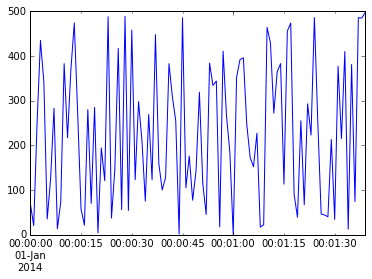

In [69]:
%matplotlib inline
ts.plot()
plt.show()

In [70]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

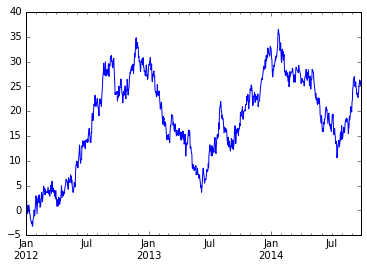

In [71]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [72]:
# Pandas plot function will print with labels as default

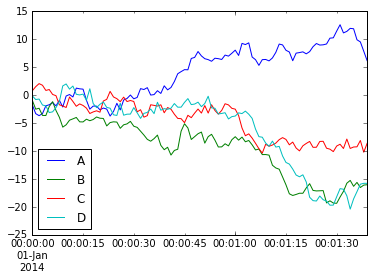

In [73]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas